In [10]:
import pandas as pd

df = pd.read_csv("../data/skygeni_sales_data.csv")
df.head()

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost


In [11]:
(df["outcome"] == "Won").mean()

np.float64(0.4526)

In [12]:
df.groupby("deal_stage")["outcome"].apply(lambda x: (x=="Won").mean())

deal_stage
Closed         0.467402
Demo           0.458293
Negotiation    0.466332
Proposal       0.446977
Qualified      0.422594
Name: outcome, dtype: float64

In [13]:
df.groupby("region")["outcome"].apply(lambda x: (x=="Won").mean())

region
APAC             0.449275
Europe           0.455799
India            0.457232
North America    0.447942
Name: outcome, dtype: float64

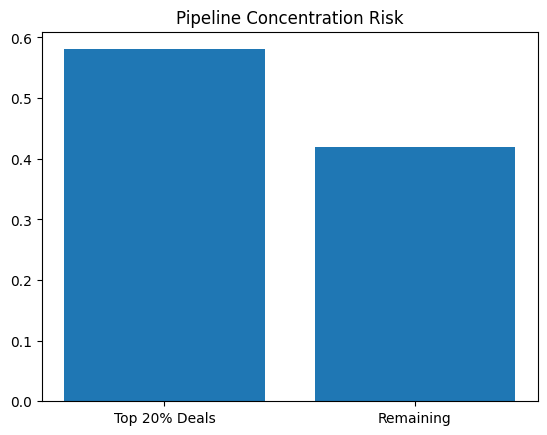

In [14]:
import matplotlib.pyplot as plt

# Win rate by stage
df.groupby("deal_stage")["outcome"].apply(lambda x: (x=="Won").mean()).plot(kind="bar")
plt.title("Win Rate by Stage")
plt.savefig("../outputs/win_rate_by_stage.png")
plt.clf()

# Win rate by region
df.groupby("region")["outcome"].apply(lambda x: (x=="Won").mean()).plot(kind="bar")
plt.title("Win Rate by Region")
plt.savefig("../outputs/win_rate_by_region.png")
plt.clf()

# Pipeline concentration
df_sorted = df.sort_values("deal_amount", ascending=False)
top20 = df_sorted.head(int(0.2*len(df)))
concentration = top20["deal_amount"].sum() / df["deal_amount"].sum()

plt.bar(["Top 20% Deals","Remaining"], [concentration, 1-concentration])
plt.title("Pipeline Concentration Risk")
plt.savefig("../outputs/pipeline_concentration.png")